 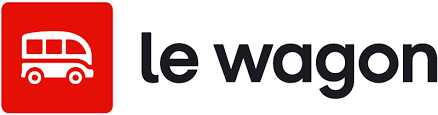

# Shop orders analysis

In this challenge, you will analyze data from [Sumup](https://www.sumup.com/fr-fr/) who wants to analyse its restaurant orders and categorize them.


Upload [Tiller_order_data.csv](https://drive.google.com/file/d/1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a/view?usp=sharing) in Colab and load it in a DataFrame `df_order`


## Exploratory Analysis


In [ ]:
import pandas as pd

df_order = pd.read_csv('Tiller_order_data.csv')

df_order.head(5)

/tmp/ipykernel_10423/379044621.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_order = pd.read_csv('Tiller_order_data.csv')


,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17 UTC,2019-01-12 19:58:38 UTC,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09 UTC,2019-01-16 22:10:50 UTC,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46 UTC,2019-01-12 19:50:32 UTC,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12 UTC,2019-01-24 21:58:59 UTC,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06 UTC,2019-01-12 19:21:03 UTC,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9


What are the different statuses of an order? How many orders are there per status?   

In [ ]:
print(df_order.groupby('dim_status').id_order.count().reset_index())

    dim_status  id_order
0       CLOSED    116939
1  IN_PROGRESS       365


What is the proportion of orders ?  \
You can use the `.value_counts()` function, with the optional argument `normalize=True`

In [ ]:
print(df_order.dim_status.value_counts(normalize=True))

dim_status
CLOSED         0.996888
IN_PROGRESS    0.003112
Name: proportion, dtype: float64


How many restaurants are there? What are their ids?

In [ ]:
print(f'There is {len(df_order.id_store.unique())} restaurants')
print(f'Their ids are: {df_order.id_store.unique()}')

There is 10 restaurants
Their ids are: [8052 8347 8283 9084 4337  360 1796 7965 6293 4542]


## Aggregations

Compute the total turnover per restaurant. Which restaurant has the highest turnover?


In [ ]:
df_order.groupby('id_store').m_cached_price.sum().reset_index().sort_values('m_cached_price', ascending=False)

,id_store,m_cached_price
5,7965,1138585.95
2,4337,865847.30
9,9084,479040.75
0,360,386934.14
7,8283,369822.82
4,6293,359718.00
6,8052,327758.85
1,1796,321099.69
3,4542,243789.69
8,8347,23.00


> **7965**

Count the number of orders per restaurant. Which restaurant has the most orders? Is it the same as the one with the highest turnover?


In [ ]:
df_order.groupby('id_store').id_order.count().reset_index().sort_values('id_order', ascending=False)

,id_store,id_order
1,1796,27349
2,4337,20003
3,4542,17641
4,6293,16103
7,8283,10023
5,7965,9091
9,9084,7804
6,8052,4906
0,360,4383
8,8347,1


Calculate the average price of an order for each restaurant. Do you think you are dealing with similar categories of restaurants ?


In [7]:
df_order.groupby('id_store').m_cached_price.mean().reset_index().sort_values('m_cached_price', ascending=False)

,id_store,m_cached_price
5,7965,125.243202
0,360,88.280662
6,8052,66.807756
9,9084,61.384002
2,4337,43.285872
7,8283,36.897418
8,8347,23.000000
4,6293,22.338570
3,4542,13.819494
1,1796,11.740820


## Column transformations


The problem is that an order may be placed for several people. Instead, we want to know the average price spent by a single person in the restaurant.

Add a column to `df_order`,  representing the price per customer for each order.


In [ ]:
df_order['avg_price_per_person'] = df_order.m_cached_price / df_order.m_nb_customer

Using the previous column, calculate the average price spent by each person in each of the restaurants.

In [9]:
df_order[df_order['m_nb_customer'] == 0]['m_nb_customer'].count()

np.int64(356)

In [ ]:
df_order.groupby('id_store').avg_price_per_person.mean().reset_index().sort_values('avg_price_per_person', ascending=False)

,id_store,avg_price_per_person
0,360,inf
1,1796,inf
2,4337,inf
4,6293,inf
5,7965,inf
9,9084,inf
7,8283,36.897418
6,8052,16.698658
3,4542,13.819494
8,8347,11.500000


There seems to be problem with the quality of data, as we can notice the presence of `NaN`for half of our restaurant

Do you have any idea why?


> **The column `m_nb_customer` has a lot of 0 values**

## Cleaning


Fill the 0 values in the `m_nb_customer` column with 1, then eliminate the rows where the `m_cached_price` is 0.

In [ ]:
df_order[df_order['m_nb_customer'] == 0] = 1

In [ ]:
df_order = df_order[df_order['m_cached_price'] != 0]

Recalculate the price_per_customer column and the average price spent by each person in each restaurant.

In [ ]:
df_order['avg_price_per_person'] = df_order.m_cached_price / df_order.m_nb_customer
df_order.groupby('id_store').avg_price_per_person.mean().reset_index().sort_values('avg_price_per_person', ascending=False)

,id_store,avg_price_per_person
6,7965,102.619056
3,4337,43.497471
8,8283,36.901100
1,360,31.892529
10,9084,30.567094
5,6293,16.809143
7,8052,16.722518
4,4542,13.821061
2,1796,11.846780
9,8347,11.500000


## Order duration analysis


Restaurant `7965` has a higher price per person than the rest.  
Let's look at the time spent at the table to determine if it matches the characteristics of a fancy restaurant.




Convert the `date_opened` and `date_closed` columns to **datetime** format.


In [23]:
#your code here
df_order['date_opened'] = pd.to_datetime(df_order['date_opened'], utc=True, errors='coerce')
df_order['date_closed'] = pd.to_datetime(df_order['date_closed'], utc=True, errors='coerce')

In [24]:
print(df_order.dtypes)

id_order                              int64
id_store                              int64
id_table                            float64
id_waiter                           float64
id_customer                         float64
id_external                          object
id_device                           float64
date_opened             datetime64[ns, UTC]
date_closed             datetime64[ns, UTC]
dim_name                             object
dim_status                           object
dim_type                              int64
dim_comment                          object
dim_source                           object
m_nb_customer                         int64
m_cached_payed                      float64
m_cached_price                      float64
avg_price_per_person                float64
dtype: object


Run the code below to calculate the time between the opening and closing date of an order in minutes.

In [25]:
df_order["order_duration"] = (df_order.date_closed - df_order.date_opened).dt.total_seconds() / 60

Compute the average duration spent at each table for every restaurant.

In [26]:
#your code here
df_order.groupby('id_store').order_duration.mean().reset_index().sort_values('order_duration', ascending=False)

,id_store,order_duration
7,8052,164.739022
10,9084,103.063969
1,360,96.551532
6,7965,53.649000
5,6293,30.249566
3,4337,5.855529
4,4542,3.930523
9,8347,3.900000
2,1796,3.409303
8,8283,2.005228


Certain restaurants exhibit notably brief average order times, indicating a potential presence of fast food establishments among them.


## Joins

Download  [Tiller_order_line.csv](https://drive.google.com/file/d/1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ/view?usp=sharing) and [Tiller_store_data.csv](https://drive.google.com/file/d/1vQRlCYTAaikHMR3zTqy09r1QBNdZgraN/view?usp=sharing) and upload them in two DataFrame `df_line` and `df_store`.


In [53]:
df_line =  pd.read_csv('Tiller_order_line.csv')
df_store =  pd.read_csv('Tiller_store_data.csv')

What new information do you have access to through this data?

In [28]:
df_line

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,m_nb_payed,dim_feature_type,dim_unit_measure,dim_unit_measure_display
0,626609716,139058632,2020-08-25 17:27:14 UTC,2020-08-25 17:27:25 UTC,1.0,15.00,12.500000,15.00,12.500000,0.200,0.0,PRODUCT,VINS ROUGES,TWIST AGAIN 2018 VDF - YOANN ROMAGNE,DONE,0,NaN,UNIT,UNIT
1,403167240,94770355,2019-09-27 07:47:14 UTC,2019-09-27 07:47:18 UTC,1.0,25.90,21.583333,25.90,21.583333,0.200,0.0,PRODUCT,LIQUIDES 50ML AUTRES,MOMMY CAKE,DONE,0,NaN,UNIT,UNIT
2,578564178,127794604,2020-06-12 11:07:09 UTC,2020-06-12 11:07:25 UTC,1.0,4.20,3.818182,4.20,3.818182,0.100,0.0,PRODUCT,Déjeuner,FORMULE JUS 30CL,DONE,0,NaN,UNIT,UNIT
3,329942564,77841193,2019-06-17 13:13:30 UTC,2019-06-17 13:13:43 UTC,1.0,2.20,2.085308,2.20,2.085308,0.055,0.0,PRODUCT,BOISSONS,EVIAN - BADOIT - COCA,DONE,0,NaN,UNIT,UNIT
4,348375251,82283609,2019-07-12 20:14:51 UTC,2019-07-12 20:15:38 UTC,1.0,-5.16,-5.160000,-5.16,-5.160000,0.000,0.0,DISCOUNT,VARIOUS,DISCOUNT,DONE,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443832,290984866,68279225,2019-04-15 11:15:29 UTC,2019-04-15 11:16:52 UTC,1.0,9.50,9.004739,9.50,9.004739,0.055,0.0,PRODUCT,Déjeuner,COMPOSITION,DONE,0,NaN,UNIT,UNIT
443833,389430312,91598965,2019-09-09 10:50:22 UTC,2019-09-09 10:50:28 UTC,1.0,9.50,9.004739,9.50,9.004739,0.055,0.0,PRODUCT,Déjeuner,COMPOSITION,DONE,0,NaN,UNIT,UNIT
443834,312176545,73493364,2019-05-21 11:56:46 UTC,2019-05-21 11:57:35 UTC,1.0,9.50,9.004739,9.50,9.004739,0.055,0.0,PRODUCT,Déjeuner,COMPOSITION,DONE,0,NaN,UNIT,UNIT
443835,379325655,89449501,2019-08-28 11:20:46 UTC,2019-08-28 11:22:49 UTC,1.0,9.50,9.004739,9.50,9.004739,0.055,0.0,PRODUCT,Déjeuner,COMPOSITION,DONE,0,NaN,UNIT,UNIT


In [54]:
df_store

,id_store,date_created,dim_zipcode,dim_country,dim_currency
0,2576,2016-07-12 16:15:31+00:00,34120,FR,EUR
1,2538,2016-07-07 16:35:44+00:00,47800,FR,EUR
2,2468,2016-06-30 12:44:25+00:00,06470,FR,EUR
3,2375,2016-06-21 12:52:36+00:00,76000,FR,EUR
4,2328,2016-06-16 13:59:52+00:00,75018,FR,EUR
...,...,...,...,...,...
495,11412,2019-11-11 17:38:57+00:00,7500,CH,CHF
496,3453,2016-12-05 17:40:56+00:00,Abidjan,CI,XOF
497,1070,2016-01-15 08:44:03+00:00,01 BP,CI,XOF
498,425,2015-08-28 18:58:25+00:00,2687,GN,GNF


<details>
    <summary> Answer 💡 </summary>

- `Order line` = The different products in an order
- `Store data` = Information about the restaurant/bar

</details>


Paris is divided into 20 districts. Each of them has a unique code 75001, 75002, ..., 75019, 75020. \
How many orders were placed in the `2nd district`?



In [67]:
df_some1 = df_order.merge(df_store, how='left', on='id_store')

print(f'Paris second district has {df_some1[df_some1['dim_zipcode'] == '75002']['id_order'].count()} orders')

Paris second district has 59191 orders


Let's have a look at restaurant `4542`, which shows a very brief average ordering time.


Retrieve the most ordered items in this restaurant by retaining only the **id_store** and **id_order** columns from `df_order`, as well as the **id_order**, **id_order_line**, and **dim_name** columns from `order_line`.


In [ ]:
df_some2 = df_line[['id_order', 'id_order_line', 'dim_name']].merge(df_order[['id_store', 'id_order']], how='left', on='id_order')

x = df_some2.groupby('dim_name').id_order_line.count().reset_index().sort_values('id_order_line', ascending=False)

y = x.loc[x.id_order_line == x.id_order_line.max(), 'dim_name'].iloc[0]

print(f'The most selled item is {y}')

The most selled item is BIG
